## Random Walks
Guido Raos, Politecnico di Milano, May 2022 (guido.raos@polimi.it)

The [random walk](https://en.wikipedia.org/wiki/Random_walk) is an interesting model for a number of phenomena, such as:
* [Brownian motion](https://en.wikipedia.org/wiki/Brownian_motion);
* diffusion of atoms/molecules in gases, liquids and solids;
* the large-scale "unperturbed" conformation of polymer chains (in the melt state, where "excluded volume" effects are negligible);
* the light intensity at a point due to many incoherent sources;
* price fluctuations on the stock market;
* etc. etc.

In this notebook we are going simulate a random walk in one dimension. We will compare the results with the analytical expressions which can be derived in the discrete case (exact expressions, applicable to a small number of steps) and in the continuum limit (approximate expression, valid for a large number of small steps).

A good introduction to random walks is contained in Chapter 1 of Reif's texbook (Federick Reif, "Fundamentals of Statistical and Thermal Physics", McGraw-Hill, 1965), and we shall follow its notation. It contains the mathematical derivations of the results presented below. Reif's book is really good as an introductory textbook, and I recommend it if you are interested in statistical mechanics. Reif died recently, here is an obituary: https://aapt.org/Membership/Frederick_Reif.cfm

## Introduction and key equations

We consider the problem of the random motion of a "walker" (a particle, a drunkard, etc.) moving in one dimension (along $x$). At $t=0$, the walker is at $x=0$. At regular intervals (every second, say) it takes one step of length $l$ along $x$, either in the positive (to the right) or the negative (to the left) direction. The direction taken at each step is random, with probabilities $p$ (to the right) and $q=1-p$ (to the left). The simplest case is that with $p=q=0.5$, in which there is symmetry between the left and right directions. A situation with $p \neq q$ may indicate a "bias" in the walker's motion, which could be produced by a gradient in the potential energy (e.g., a drunkard trying to walk on a sloping road, a charged particle in an electric field, etc.). We assume that there is no correlation between the direction at one step and the direction at a previous steps (the walker has no "memory"). Further notation:
* $n_1$, $n_2$: number of steps to the right and to the left
* $N=n_1+n_2$: total number of steps
* $m=n_1-n_2=2n_1-N$: total displacement (in units of $l$).

The motion of an individual walker is totally unpredictable. But, if we consider a large number of such walkers (or the same walker restarting from the origin many times), we have a statistical problem. Thanks to the "law of large numbers", the probabilities of different outcomes become predictable, within a certain ensemble (which should always be defined). Below I give some key results from the probabilistic analysis of such random walks (see Reif for the mathematical derivations).

### Discrete case

The probability of taking $n_1$ steps to the right and $n_2=N-n_1$ steps to the left, in any order, is given by the *binomial distribution*:
\begin{equation*}
W_N(n_1) = \frac{N!}{n_1! (N-n_1)!} p^{n_1} q^{N-n_1}
\end{equation*}
Note that the distribution is nomalized, for all $N$:
\begin{equation*}
\sum_{n_1=0}^N W_N(n_1) = (p+q)^N = 1
\end{equation*}

It can be proven that mean number of right steps is:
\begin{equation*}
\overline{n_1} = \sum_{n_1=0}^N W_N(n_1)n_1 = Np
\end{equation*}
and the mean overall displacement is:
\begin{equation*}
\overline{m} = N(p-q)
\end{equation*}

The variance or dispersion in the number of right steps is defined as:
\begin{equation*}
\overline{ \left( \Delta n_1 \right)^2 } = \overline{(n_1-\overline{n_1})^2} = \overline{n_1^2} - \overline{n_1}^2 
\end{equation*}
This is equal to:
\begin{equation*}
\overline{ \left( \Delta n_1 \right)^2 } = Npq 
\end{equation*}
The variance in the overall displacement is then given by:
\begin{equation*}
\overline{ \left( \Delta m \right)^2 } = 4 \overline{ \left( \Delta n_1 \right)^2 } = 4Npq 
\end{equation*}

### Continous case

We now consider the situation with $N>>1$ (large number of steps). We assume that each step is small, in comparison with the shortest length scale of interest: $l<<dx$. In this case, the net displacement $x=ml$ can be treated as a continous variable.

The probability that walker's displacement is between $x$ and $x+dx$ is given by the Gaussian distribution:
\begin{equation*}
\mathcal{P}(x)dx = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right] dx .
\end{equation*}
where:
\begin{eqnarray}
\mu & \equiv & (p-q)Nl \\
\sigma & \equiv & 2 \sqrt{Npq} l \\
\end{eqnarray}
Note that, while $W_N(n_1)$ is a probability, $\mathcal{P}(x)$ is a *probability density*: it must be multiplied by a small interval $dx$ (or integrated over a larger integral) in order to obtain an actual probability.

The distribution is normalized and has the following properties:
\begin{eqnarray}
\int_{-\infty}^{+\infty} \mathcal{P}(x)dx &=& 1 \\
\overline{x} \equiv \int_{-\infty}^{+\infty} x \mathcal{P}(x)dx &=& \mu \\
\overline{(\Delta x)^2} \equiv \overline{(x-\overline{x})^2} = \int_{-\infty}^{+\infty} (x-\mu)^2 \mathcal{P}(x)dx &=& \sigma^2 \, . \\
\end{eqnarray}

```
 QUOTE
```

## Simulating a random walk in 1D

This is a simple Python code which perfoms the simulation of a random walk. The code assumes that the step length is $l=1$.

No. of steps, p and q:   20, 0.5, 0.5
Total number or walkers: 1000
mu and xaver:            0.0, 0.034
sigma and xvar:          4.47213595499958, 4.589863178788669
[0.         0.0015373  0.00461189 0.03597274 0.08639608 0.05103825
 0.08332148 0.0362802  0.00707156 0.00122984 0.        ]


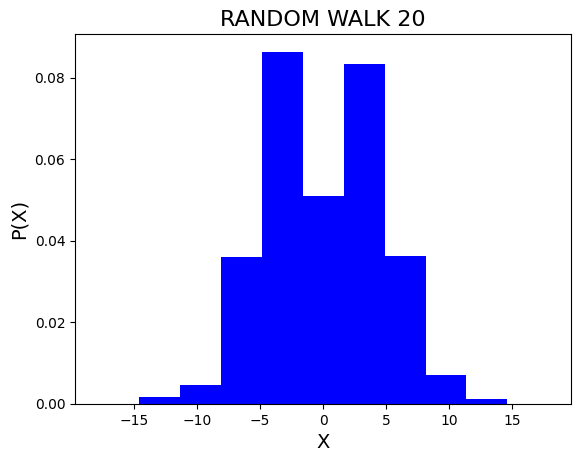

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

# Define the number of repetitions (the size of the statistical ensemble)
M = 1000
# Define the number of steps to be taken
N = 20
# Define the probability of a step to the right or to the left
p = 0.5
q = 1-p

# Set up the RW array to accumulate the statistics final coordinates of the walker.
RW = np.zeros(M)

# The simulation goes on here
rng = np.random.default_rng(23456) # The "random" is initialized by a seed.
for walker in range(M):
    x = 0.0
    for step in range(N):
        # extract a random number, on the [0,1) interval
        r = rng.random()
        # Take a step to the right if r<p, a step to the left if r>= p
        if (r<p):
            x = x+1.0
        else:
            x = x-1.0
    # At the end of the walk, record the final position of the walker.
    RW[walker] = x

# Compute the average and variance
# (note: here we could also have used numpy's built-in functions).
xaver = 0.0
for x in RW:
    xaver += x
xaver /= M
xvar2 = 0.0
for x in RW:
    xvar2 += (x-xaver)**2
xvar2 /= M    
xvar = xvar2**0.5
# These are the expected values, on the basis of the theory
mu = N*(p-q)
sigma = (4*N*p*q)**0.5

# Print out and plot the results
print("No. of steps, p and q:   " + str(N)+", "+str(p)+", "+str(q) )
print("Total number or walkers: " + str(M) )
print("mu and xaver:            " + str(mu)+", "+str(xaver) )
print("sigma and xvar:          " + str(sigma)+", "+str(xvar) )

# Obtain the histogram "manually"
hbins = 11
hrange=[mu-4*sigma,mu+4*sigma]
delta = (hrange[1]-hrange[0])/hbins
myhisto = np.zeros(hbins)
nout = 0
for x in RW:
    ibin = int((x-hrange[0]) / delta)
#   Use Python's "try...except" construct to avoid the failure of the program,
#   in case a random walker ended out of the bounds allocated for the histogram.
    try:
        myhisto[ibin] += 1
    except IndexError:
        nout += 1
        print("RW point out of bounds, skipping this one:", x)
        
# Normalize the distribution, dividing by the number of valid points and the width of intervals (delta).
myhisto /= (M-nout)*delta
# This should agree with plotted histogram, below....
print(myhisto)

# Plot the results as a histogram. Pyplot has a built-in function to do it.
# The histogram might display some asymmetry, depending also of the odd/even number of bins.
# Note that, if we use an even/odd number of steps N, the end point will always be at an even/odd coordinate.
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.hist( RW, density=True, bins=hbins, range=hrange, color="b", align="mid" )
ax.set_xlabel('X', size=14)
ax.set_ylabel('P(X)', size=14)
ax.set_title("RANDOM WALK "+str(N), size=16)
fig.savefig("RandomWalk1D"+'.pdf')


## Extensions, questions, further work

Here are a few ideas:
* Find out how to fit a Gaussian function to a simulated distribution, and plot it on top of it so as to compare them.
* Modify the code, so as to introduce some correlation between one step and the previous one. For example: the probability of moving to the right is equal to $p+\delta$ if the previous step was also to the right, to $p-\delta$ if the previous step was to the left ($\delta$ has to be smaller than both $p$ an $q$, so as not to produce absurd results). Observe how this change affects the final distribution.
* Define it a certain range of allowed $x$ values, and use it in combination with different "boundary conditions":
    * "wall": when a walker reaches one end of the allowed range of $x$, it does not exit it but it is "bounced back"
    * "periodic": when a walker reaches one end of the allowed range of $x$, it appears on the other end (as if it was walking on a circle).
* Generalize the program to produce a random walk in two or three dimensions. At each time, a diffusing particle may take a random step along the $x$, $y$ or the $z$ directions.

## Addendum: the Central Limit Theorem

The random walk problem can be generalized in many ways. One possibility is to admit that the individual steps are random numbers drawn from a continuous distribution, instead of being "discrete" (i.e., +1 or -1). All situations can be described in terms of an appropriate "step distribution" $w(x)$.

Let $w(x)dx$ be the probability that a step taken by a walker is comprised between $x$ and $x+dx$. The former case, with probability $p$ for a right step (+1) and $(1-p)$ for a left step (-1), is described by the distribution:
\begin{equation*}
w_1(x) = p\delta(x-1) + (1-p)\delta(x+1)
\end{equation*}
where $\delta$ is the Dirac delta function.
Another possibility is to take a step with a uniform distribution over a certain interval:
\begin{equation*}
w_2(x) =   \begin{cases}
    \frac{1}{b-a}       & \quad \text{if } a \leq x \leq b\\
    0  & \quad \text{if } x<a \text{ or } x> b
  \end{cases}
\end{equation*}
Yet another possibility is that each individual step follows itself a Gaussian distribution:
\begin{equation*}
w_3(x) = \frac{1}{\sqrt{2\pi s^2}} \exp\left[-\frac{(x-r)^2}{2s^2}\right]  \, .
\end{equation*}

**One key question is:** how do the properties of the final random walk change, if we change the distribution for the individual steps? **The answer is:** not at all, under certain conditions.

According to the Central Limit Theorem (see Reif, page 39), "*no matter what* the probability distribution $w(x)$ may be, as long as the steps are *statistically independent* and  $w(x)$ falls off rapidly enough as $|x|\rightarrow \infty$, the total displacement $x$ will be distributed according to the Gaussian law *if $N$ is sufficiently large*". The distribution for the overall displacement will always be:
\begin{equation*}
\mathcal{P}(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right]
\end{equation*}
where:
\begin{eqnarray}
\mu &=& Nr \\
\sigma^2 &=& Ns^2 \, .
\end{eqnarray}
In the two equations above, $r$ and $s^2$ are the mean and the variance of the individual step distributions. For $w_1(x)$ they are:
\begin{eqnarray*}
r &=& 2p-1 \\
s^2 &=& 4p(1-p) \, .
\end{eqnarray*}
For $w_2(x)$ they are:
\begin{eqnarray*}
r &=& \frac{a+b}{2} \\
s^2 &=& \frac{(b-a)^2}{12} \, .
\end{eqnarray*}
For $w_3(x)$, they already appear as such in the defining equation. The condition that "$𝑤(𝑥)$ falls off rapidly enough" is necessary to ensure that the variance of the step distribution has a finite value:
\begin{equation*}
s^2 = \int_{-\infty}^{+\infty}w(x)(x-r)^2dx < \infty \,.
\end{equation*}

We can check the validity of the Central Limit Theorem by simulating random walks with different step distributions, and comparing the overall distributions obtained from them. In order to have a meaningful comparison, all step distribution should have the same average ($r$) and variance ($s^2$).

Total number of steps:   50
Total number or walkers: 10000
Parameters for w_1:  p=0.5,  q=0.5
Parameters for w_2:  a=-1.7320508075688772,  b=1.7320508075688772
Parameters for w_3:  r=0.0,  s=1.0
1. Number of lost walkers: 0
1. mu and xaver:           0.0, 0.08659999999999994
1. sigma and xvar:         7.0710678118654755, 7.107749323097995
2. Number of lost walkers: 2
2. mu and xaver:           0.0, 0.01560312062412494
2. sigma and xvar:         7.0710678118654755, 7.144197960878401
3. Number of lost walkers: 1
3. mu and xaver:           0.0, -0.019401940194019876
3. sigma and xvar:         7.0710678118654755, 7.057832875809013


Text(0, 0.5, 'P(X)')

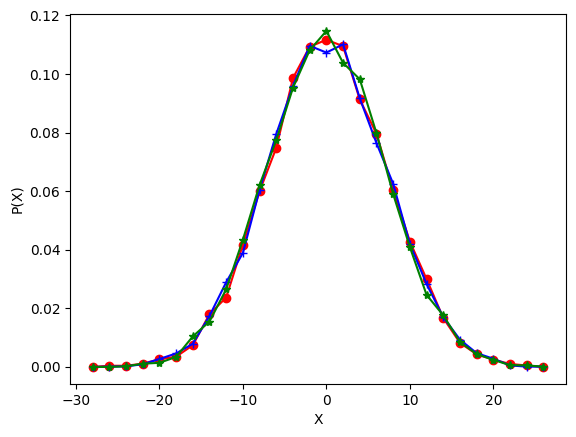

In [2]:
#%reset

import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

# -- BEGINNING OF INPUT
# Number of repetitions (the size of the statistical ensemble)
M = 10000
# Number of steps to be taken. It should be EVEN.
N = 50
# Probability of a step to the right
p = 0.5
q = 1-p
# -- END OF INPUT

# Make sure that N is an even number.
N = (N//2)*2
# Compute the parameters for the other step distributions
r = 2*p-1
s = 2*(p*(1-p))**0.5
a = r - s*3.0**0.5
b = r + s*3.0**0.5
bma = b-a

# Print out some information
print("Total number of steps:   " + str(N) )
print("Total number or walkers: " + str(M) )
print("Parameters for w_1:  p="+str(p)+",  "+"q="+str(q))
print("Parameters for w_2:  a="+str(a)+",  "+"b="+str(b))
print("Parameters for w_3:  r="+str(r)+",  "+"s="+str(s))

# Estimate the width of the "box" needed to accumulate the statistics
mu = r*N
sigma = s*N**0.5
xrange = 8*sigma + 2*mu
          
# Set up the RW array to accumulate the statistics.
# Row 0 of RW contains the x-coordinates of the points visited by the walker (center of "bins").
# To avoid the odd/even problem, we use bins of width 2 to accumulate the results.
# Rows 1, 2 & 3 of RW contain the final distributions from steps of type 1, 2 & 3.
# The size of the array is half of xrange (because each bin has width 2), and should be an even number.
size = int(xrange//4 * 2)
RW = np.zeros([4,size])
x0 = -size
for i in range(size):
    RW[0,i] = x0 + i*2

# The simulation goes on here.
# The three simulations are conducted "in parallel":
# x1, x2 and x3 are the coordinates of walker moving according to w_1, w_2 and w_3
rng = np.random.default_rng()
Nlost1 = Nlost2 = Nlost3 = 0
norm1 = norm2 = norm3 = 0
for walker in range(M):
    x1 = x2 = x3 = 0
    for step in range(N):
        # extract three random numbers from the appropriate distributions
        r1 = rng.random()
        r2 = rng.random()*bma + a
        r3 = rng.normal(loc=r, scale=s)
        # w_1: Take a step to the right if r1<p, a step to the left if r1>= p
        if (r1<p):
            x1 = x1 + 1.0
        else:
            x1 = x1 - 1.0
        # w_2 and w_3
        x2 = x2 + r2
        x3 = x3 + r3        
    # At the end of the walk, record the final position of the walkers and put the in the appropriate "bin".
    # Make a note of the number of times when the walker has "gone too far" and exited the expected interval.
    i1 = int(round((x1-x0)/2))
    if i1>0 and i1<size:
        RW[1,i1] += 1
    else:
        Nlost1 +=1
    i2 = int(round((x2-x0)/2))
    if i2>0 and i2<size:
        RW[2,i2] += 1
    else:
        Nlost2 +=1
    i3 = int(round((x3-x0)/2))
    if i3>0 and i3<size:
        RW[3,i3] += 1
    else:
        Nlost3 +=1

# A little bit of post-processing
# Normalize the final distribution
RW[1,:] /= (M - Nlost1)
RW[2,:] /= (M - Nlost2)
RW[3,:] /= (M - Nlost3)
# Compute the average and variance
xaver1 = xaver2 = xaver3 = 0.0
for i in range(size):
    xaver1 += RW[1,i] * RW[0,i]
    xaver2 += RW[2,i] * RW[0,i]
    xaver3 += RW[3,i] * RW[0,i]
xvar1 = xvar2 = xvar3 = 0.0
for i in range(size):
    xvar1 += RW[1,i] * (RW[0,i]-xaver1)**2
    xvar2 += RW[2,i] * (RW[0,i]-xaver2)**2
    xvar3 += RW[3,i] * (RW[0,i]-xaver3)**2
xvar1 = xvar1**0.5
xvar2 = xvar2**0.5
xvar3 = xvar3**0.5

# Print out and plot the results
print("1. Number of lost walkers: " + str(Nlost1) )
print("1. mu and xaver:           " + str(mu)+", "+str(xaver1) )
print("1. sigma and xvar:         " + str(sigma)+", "+str(xvar1) )
print("2. Number of lost walkers: " + str(Nlost2) )
print("2. mu and xaver:           " + str(mu)+", "+str(xaver2) )
print("2. sigma and xvar:         " + str(sigma)+", "+str(xvar2) )
print("3. Number of lost walkers: " + str(Nlost3) )
print("3. mu and xaver:           " + str(mu)+", "+str(xaver3) )
print("3. sigma and xvar:         " + str(sigma)+", "+str(xvar3) )
plt.plot(RW[0,:], RW[1,:], 'r-o')
plt.plot(RW[0,:], RW[2,:], 'b-+')
plt.plot(RW[0,:], RW[3,:], 'g-*')
plt.xlabel('X')
plt.ylabel('P(X)')

## Further work: random walk with short-range correlations¶

We want to develop a model for a random walk in which there is some correlation between one step and the previous one. The two steps may be "positively correlated" (the walker tends to go on in the same direction) or "negatively correlated" (the walker tends to go back, after each step). These may be considered as models of (for example):
* a polymer chain, with some intrinsic stiffness.
* a particle diffusing in a glassy medium, that may get trapped for a long time within a "cage", before succeeding in jumping out of it.

Fitted parameters: mean=-17.72067199618736, sigma=28.960287442170472


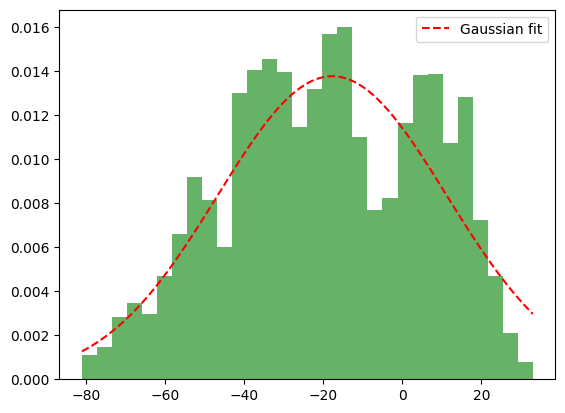

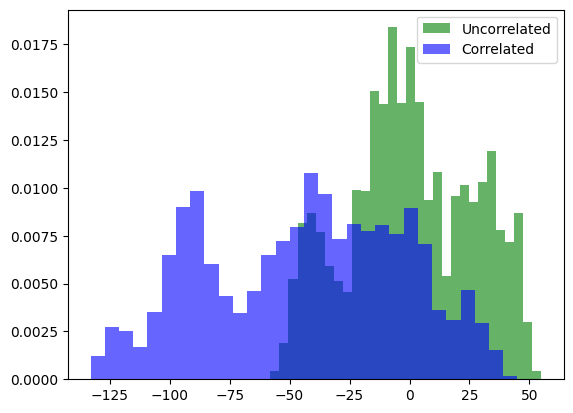

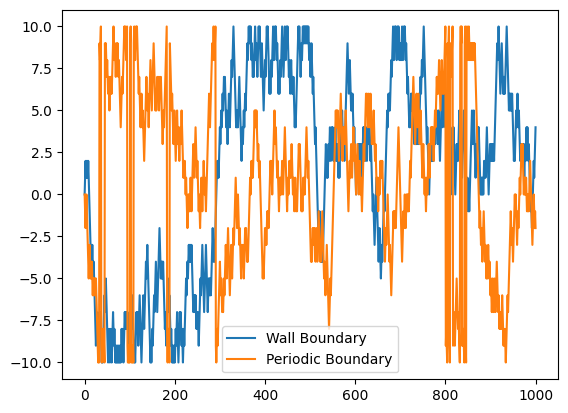

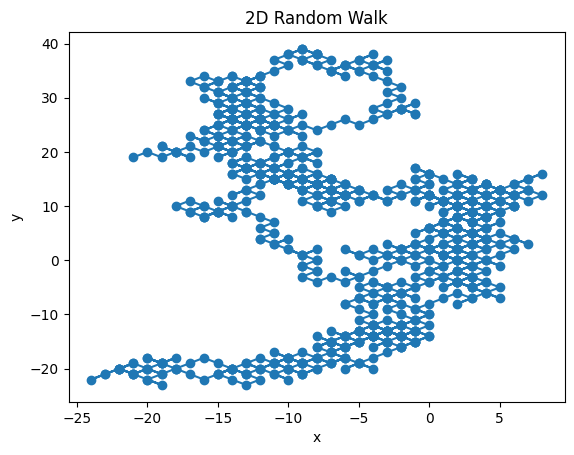

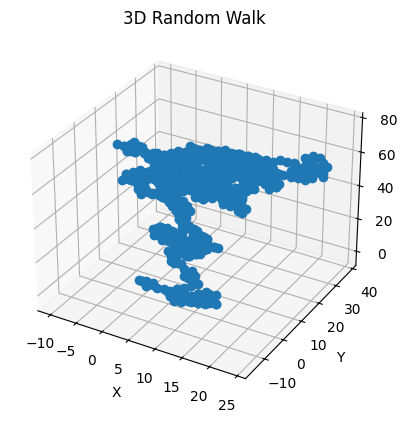

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Step 1: Generate and fit Gaussian to random walk
def random_walk(n_steps, p=0.5):
    steps = np.where(np.random.rand(n_steps) < p, 1, -1)
    return np.cumsum(steps)

def gaussian(x, mean, sigma):
    return (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(- (x - mean)**2 / (2 * sigma**2))

def fit_and_plot(n_steps):
    walk = random_walk(n_steps)
    hist, bins = np.histogram(walk, bins=30, density=True)
    bin_centers = (bins[:-1] + bins[1:]) / 2

    # Initial guesses for the parameters
    mean_guess = np.mean(walk)
    sigma_guess = np.std(walk)
    
    try:
        popt, _ = curve_fit(gaussian, bin_centers, hist, p0=[mean_guess, sigma_guess])
        print(f"Fitted parameters: mean={popt[0]}, sigma={popt[1]}")
        plt.hist(walk, bins=30, density=True, alpha=0.6, color='g')
        x_fit = np.linspace(min(walk), max(walk), 100)
        plt.plot(x_fit, gaussian(x_fit, *popt), 'r--', label='Gaussian fit')
        plt.legend()
        plt.show()
    except RuntimeError as e:
        print(f"Error in curve fitting: {e}")
    except Exception as e:
        print(f"Unexpected error: {e}")

fit_and_plot(10000)

# Step 2: Correlated Random Walk
def correlated_random_walk(n_steps, p=0.5, delta=0.1):
    steps = np.zeros(n_steps)
    steps[0] = 1 if np.random.rand() < p else -1
    for i in range(1, n_steps):
        p_step = p + delta if steps[i-1] == 1 else p - delta
        p_step = np.clip(p_step, 0, 1)
        steps[i] = 1 if np.random.rand() < p_step else -1
    return np.cumsum(steps)

def compare_walks(n_steps):
    uncorrelated = random_walk(n_steps)
    correlated = correlated_random_walk(n_steps)
    plt.hist(uncorrelated, bins=30, density=True, alpha=0.6, color='g', label='Uncorrelated')
    plt.hist(correlated, bins=30, density=True, alpha=0.6, color='b', label='Correlated')
    plt.legend()
    plt.show()

compare_walks(10000)

# Step 3: Boundary Conditions
def random_walk_with_boundaries(n_steps, boundary, condition='wall'):
    position = 0
    positions = [position]
    for _ in range(n_steps):
        step = 1 if np.random.rand() < 0.5 else -1
        if condition == 'wall':
            if position + step > boundary:
                step = -1
            elif position + step < -boundary:
                step = 1
        elif condition == 'periodic':
            if position + step > boundary:
                position = -boundary
            elif position + step < -boundary:
                position = boundary
        position += step
        positions.append(position)
    return positions

def plot_boundaries(n_steps, boundary):
    wall_walk = random_walk_with_boundaries(n_steps, boundary, condition='wall')
    periodic_walk = random_walk_with_boundaries(n_steps, boundary, condition='periodic')
    plt.plot(wall_walk, label='Wall Boundary')
    plt.plot(periodic_walk, label='Periodic Boundary')
    plt.legend()
    plt.show()

plot_boundaries(1000, 10)

# Step 4: Higher Dimensional Random Walk
def random_walk_nd(n_steps, dimensions, p=0.5):
    directions = [-1, 1]
    steps = np.zeros((n_steps, dimensions))
    for i in range(1, n_steps):
        step_direction = np.random.choice(directions, size=dimensions)
        steps[i] = steps[i-1] + step_direction
    return steps

def plot_2d_walk(n_steps):
    walk = random_walk_nd(n_steps, 2)
    plt.plot(walk[:, 0], walk[:, 1], '-o')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('2D Random Walk')
    plt.show()

def plot_3d_walk(n_steps):
    walk = random_walk_nd(n_steps, 3)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(walk[:, 0], walk[:, 1], walk[:, 2], '-o')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title('3D Random Walk')
    plt.show()

plot_2d_walk(1000)
plot_3d_walk(1000)
